In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

In [2]:
# First, let's get our neighborhood boundaries into a GeoDataFrame
gdf_barrios = gpd.read_file('../data/raw/neighbourhoods.geojson')

print(f"Loaded {len(gdf_barrios)} neighborhoods.")
print(gdf_barrios.head(3))

# Next, load the raw charging stations data
df_cargadores = pd.read_csv('../data/raw/puntos_recarga_barcelona.csv')

# We need to transform the station coordinates into actual geometry objects 
# to run spatial queries later (using standard EPSG:4326 for now)
gdf_cargadores = gpd.GeoDataFrame(
    df_cargadores, 
    geometry=gpd.points_from_xy(df_cargadores['Station_lng'], df_cargadores['Station_lat']),
    crs="EPSG:4326"
)

print(f"Loaded {len(gdf_cargadores)} charging stations.")

Loaded 75 neighborhoods.
            neighbourhood neighbourhood_group  \
0                el Raval        Ciutat Vella   
1          el Barri Gòtic        Ciutat Vella   
2  la Dreta de l'Eixample            Eixample   

                                            geometry  
0  MULTIPOLYGON (((2.17737 41.37532, 2.17852 41.3...  
1  MULTIPOLYGON (((2.18287 41.38074, 2.18289 41.3...  
2  MULTIPOLYGON (((2.17091 41.40182, 2.17332 41.3...  
Loaded 393 charging stations.


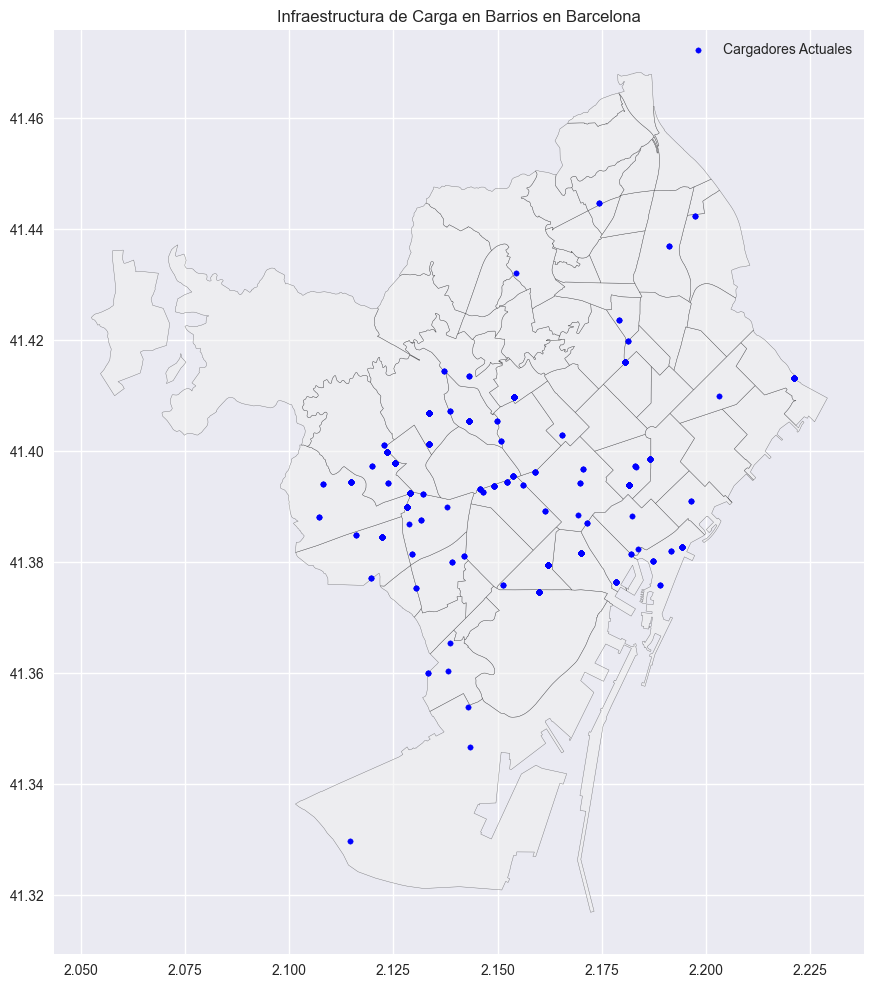

In [3]:
fig, ax = plt.subplots(figsize=(12, 12))

gdf_barrios.plot(ax=ax, color='#f0f0f0', edgecolor='black', alpha=0.5)

gdf_cargadores.plot(ax=ax, color='blue', markersize=15, label='Cargadores Actuales')

ax.set_title('Infraestructura de Carga en Barrios en Barcelona')
plt.legend()
plt.show()